<a href="https://colab.research.google.com/github/bijumanvya/Indix/blob/master/FE_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [5]:
iris=load_iris()
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


from matplotlib import pyplot as plt
_df_0['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal width (cm)'].plot(kind='hist', bins=20, title='petal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['petal width (cm)'].plot(kind='line', figsize=(8, 4), title='petal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

#Create a cilun with Species, with values driven by integer value of iris target value into a Categorical value of Target Names from iris.

In [6]:
df_iris['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Melt Data for better multi_featuring plotting
#Convert column to rows
#Good for plotts



In [7]:
df_iris_melt=pd.melt(df_iris,id_vars=['species'],var_name='Features',value_name='Value')
df_iris_melt.head()

,species,Features,Value
0,setosa,sepal length (cm),5.1
1,setosa,sepal length (cm),4.9
2,setosa,sepal length (cm),4.7
3,setosa,sepal length (cm),4.6
4,setosa,sepal length (cm),5.0


#Violin Plot for feature distribution

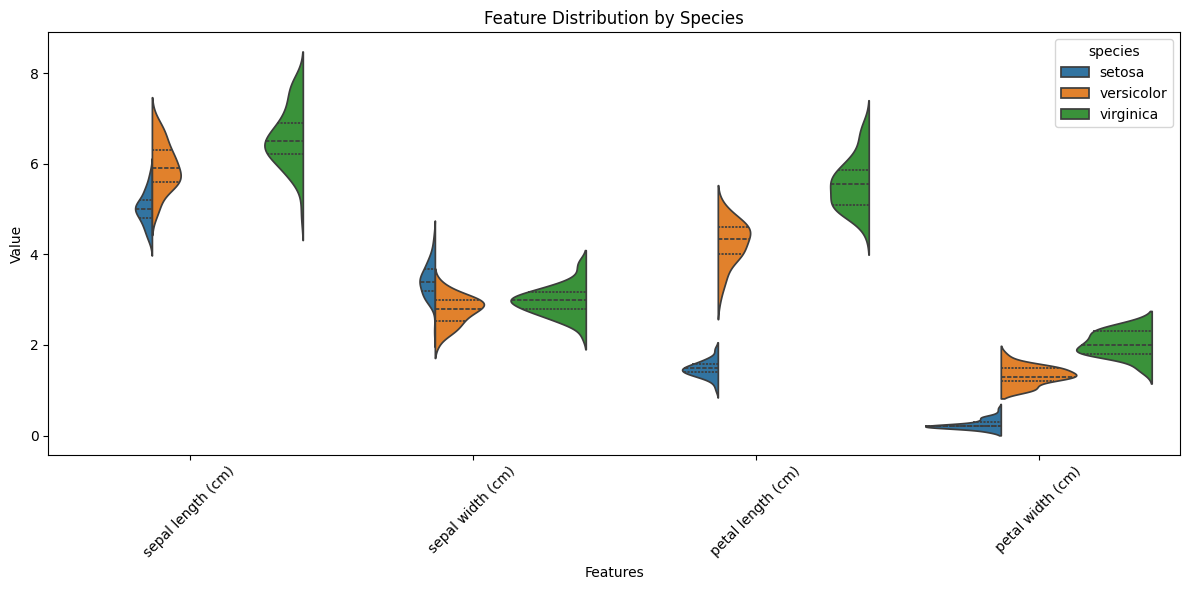

In [8]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Features',y='Value',hue='species',data=df_iris_melt,split=True,inner='quart')
plt.title('Feature Distribution by Species')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Feature Importance by RandomForest

In [9]:
X=df_iris[iris.feature_names]
y=df_iris['species']
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X,y)

RandomForestClassifier(random_state=42)

#Plot the featue engineering

/tmp/ipython-input-3909622579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Features',data=importance,palette='rocket')


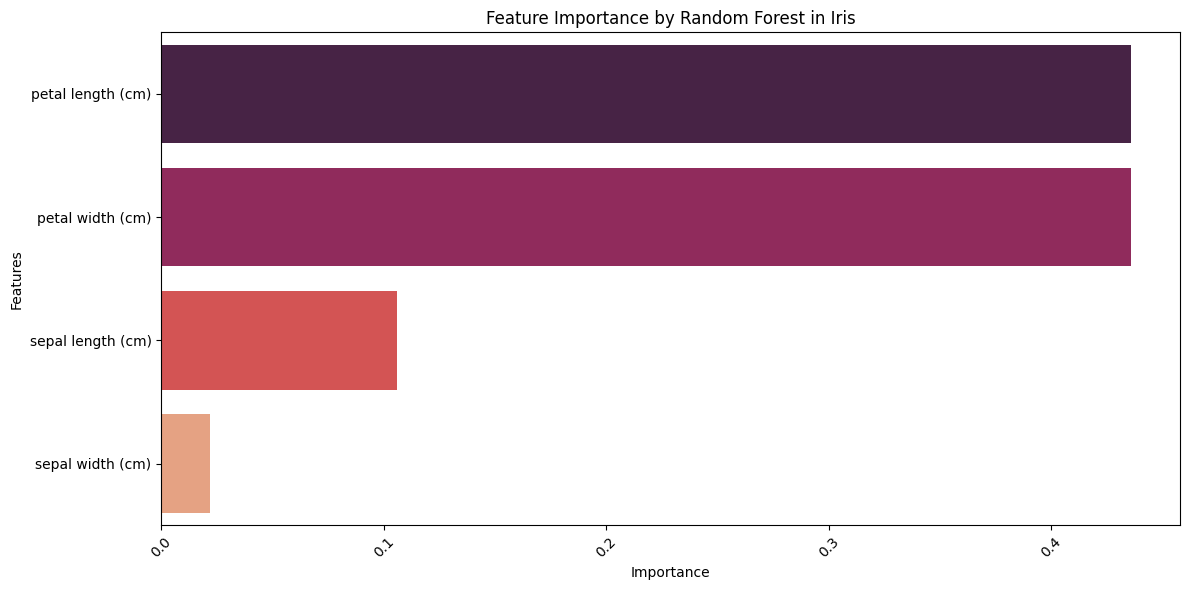

In [10]:
importance=pd.DataFrame({'Features':X.columns,'Importance':rf_model.feature_importances_})
importance=importance.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance',y='Features',data=importance,palette='rocket')
plt.title('Feature Importance by Random Forest in Iris')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()